#### On the first try we did the same configaration as with the mnist and got a modarate increase in performance
<br> res = 10 went from 76 to 82
<br> res = 6 went from 69 to 79
<br> res = 4 went from 52 to 73
<br> res = 3 went from 40 to 64
<br> res = 2 went from 35 to 56
#### On this run we traid to add more images in the stack so we moved from 5 to 10. 

In [ ]:
import numpy as np
import cv2
import misc
from RL_networks import Stand_alone_net
import pickle

import importlib
importlib.reload(misc)

In [3]:

from __future__ import division, print_function, absolute_import

# PyTorch libraries and modules
import torchvision
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn as nn
from mnist import MNIST

fmnist = torchvision.datasets.FashionMNIST('/home/labs/ahissarlab/orra/datasets/fmnist', train = True, download = True)
#images, labels = mnist.load_training()

# Training Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 128

validation_index=-5000

# Network Parameters
size=None
padding_size=(128,128)
# num_input = padding_size[0]*padding_size[1] # MNIST data input (img shape: 28*28)
num_classes = None 
# dropout = 0.25 # Dropout, probability to drop a unit

import matplotlib.pyplot as plt
%matplotlib notebook
import SYCLOP_env as syc



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw


  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw


  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw


  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/labs/ahissarlab/orra/datasets/fmnist/FashionMNIST/raw
Processing...


/home/labs/ahissarlab/orra/.conda/envs/orra_env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1614378062065/work/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
images, labels = fmnist.data, fmnist.targets

In [6]:
len(images)

10000

In [5]:
#Define function for low resolution lens on syclop
def bad_res101(img,res):
    sh=np.shape(img)
    dwnsmp=cv2.resize(img,res, interpolation = cv2.INTER_CUBIC)
    upsmp = cv2.resize(dwnsmp,sh, interpolation = cv2.INTER_CUBIC)
    return upsmp

<IPython.core.display.Javascript object>


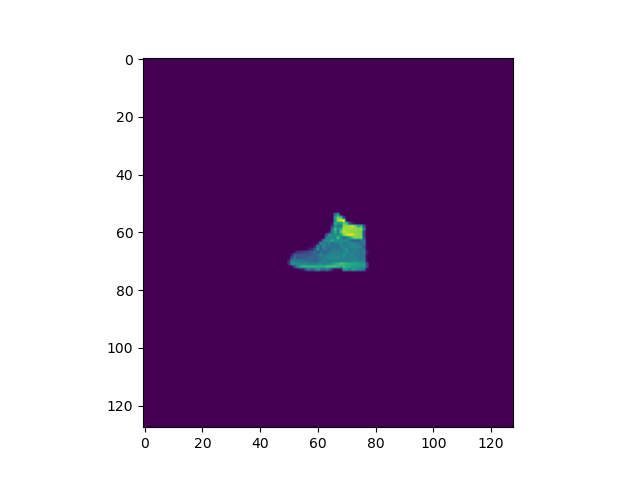

In [9]:
plt.figure()
plt.imshow(misc.build_mnist_padded(1./256*np.reshape(images[90],[1,28,28])))

In [10]:
img=misc.build_mnist_padded(1./256*np.reshape(images[0],[1,28,28]))

In [11]:
scene = syc.Scene(image_matrix=img)
sensor = syc.Sensor(winx=56,winy=56,centralwinx=28,centralwiny=28)
agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])

In [20]:
q_sequence = np.array([[agent.max_q[0]//2, qq ] for qq in np.arange(agent.max_q[1]//2-10,agent.max_q[1]//2+10,2)])
q_sequence += np.array([[pp, 0] for pp in [] + list(np.linspace(-5,5,6,dtype = int)) + list(-np.linspace(0,5,4,dtype = int))])
#q_sequence = np.array(q_sequence)
q_sequence

array([[31, 26],
       [33, 28],
       [35, 30],
       [37, 32],
       [39, 34],
       [41, 36],
       [36, 38],
       [35, 40],
       [33, 42],
       [31, 44]])

In [13]:
q_sequence

array([[31, 26],
       [36, 30],
       [41, 34],
       [36, 38],
       [31, 42]])

In [12]:
sensor.hp.resolution_fun = lambda x: bad_res101(x,(28,28))
imim=[]
dimim=[]
agent.set_manual_trajectory(manual_q_sequence=q_sequence)
for t in range(70):
    agent.manual_act()
    sensor.update(scene, agent)
    imim.append(sensor.central_frame_view)
    dimim.append(sensor.central_dvs_view)
    

<IPython.core.display.Javascript object>


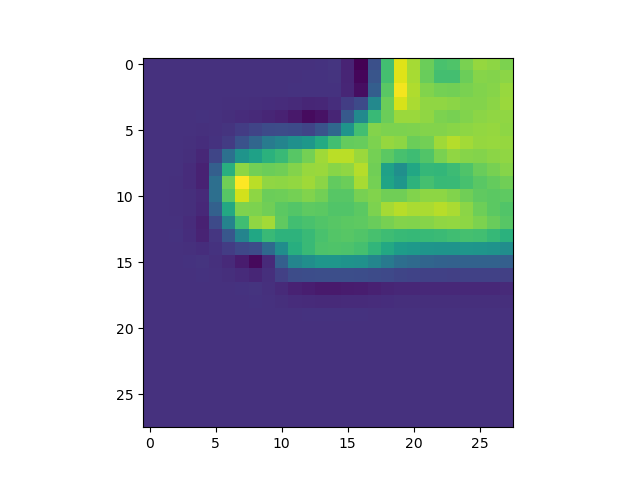

<IPython.core.display.Javascript object>


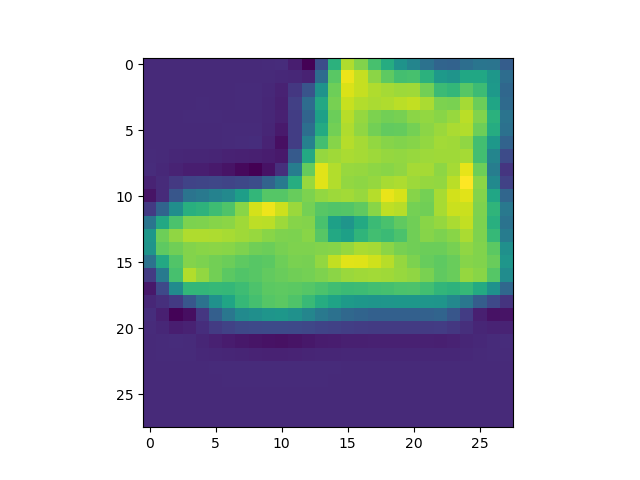

<IPython.core.display.Javascript object>


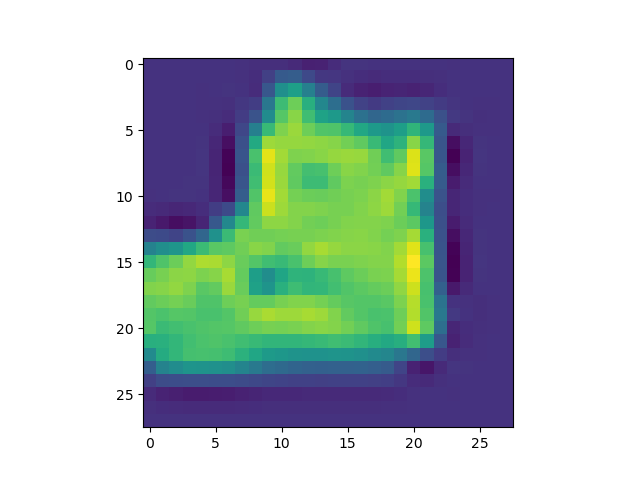

<IPython.core.display.Javascript object>


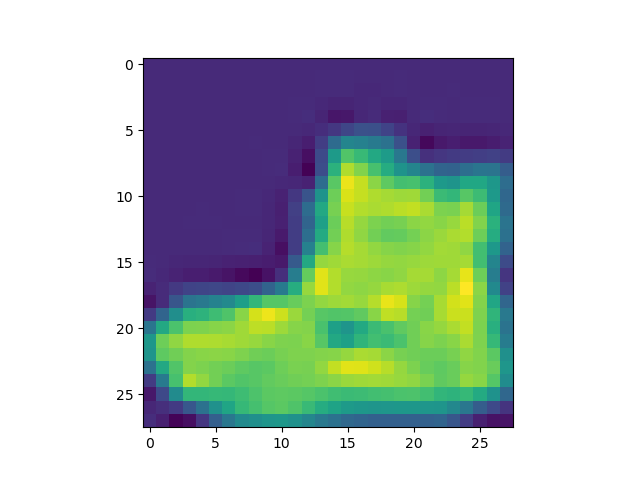

<IPython.core.display.Javascript object>


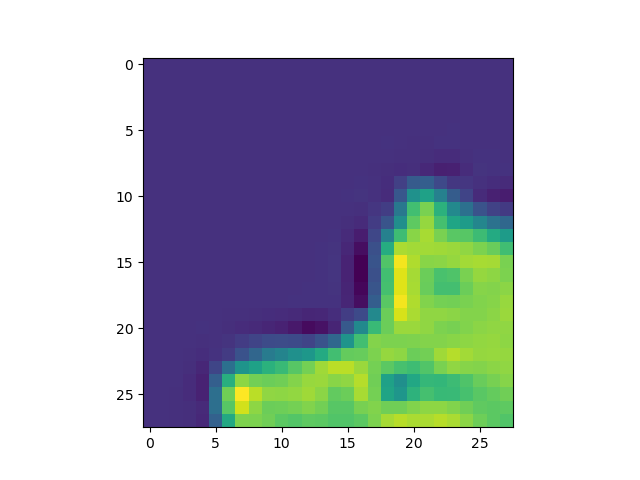

<IPython.core.display.Javascript object>


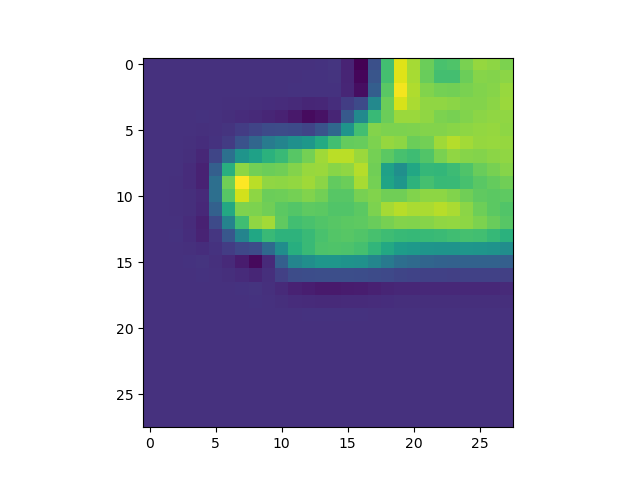

<IPython.core.display.Javascript object>


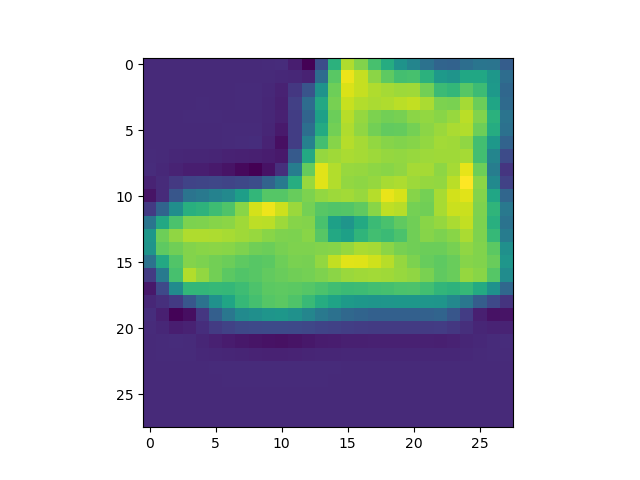

<IPython.core.display.Javascript object>


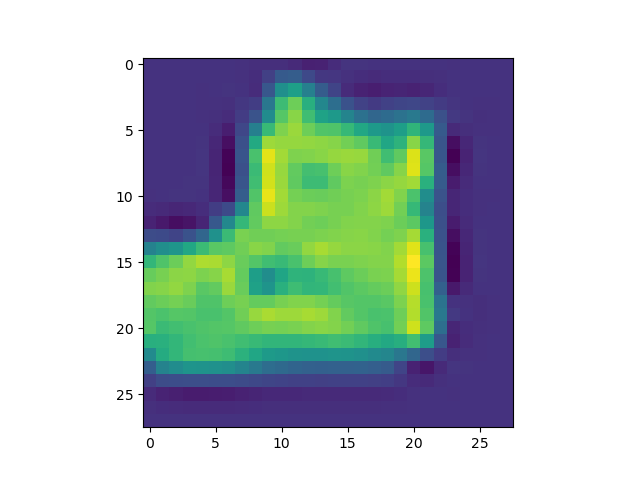

<IPython.core.display.Javascript object>


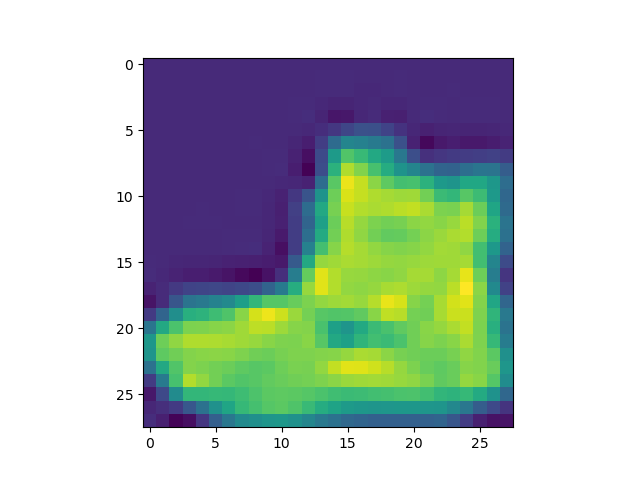

<IPython.core.display.Javascript object>


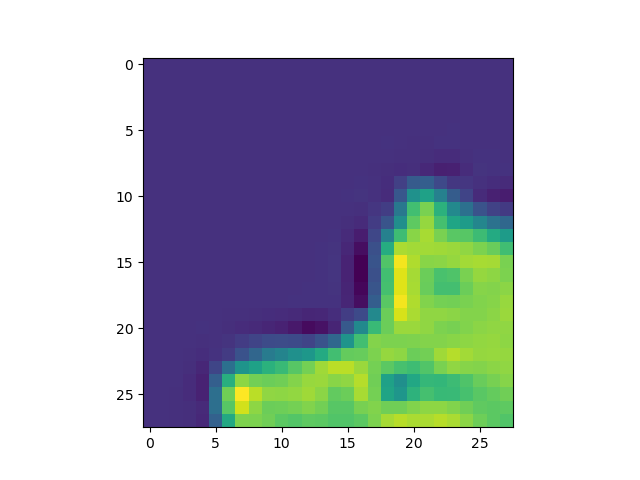

<IPython.core.display.Javascript object>


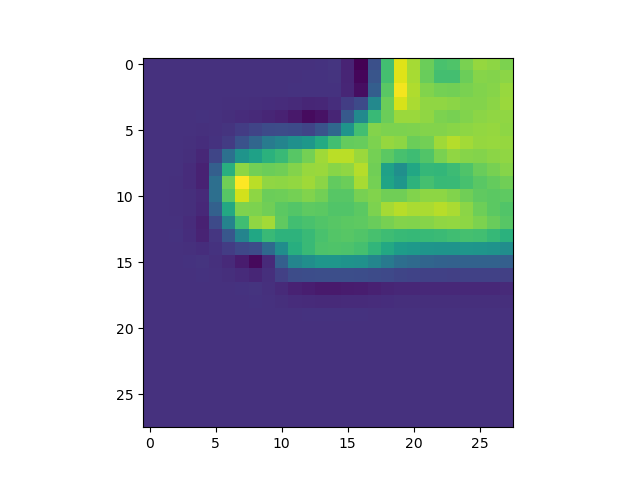

<IPython.core.display.Javascript object>


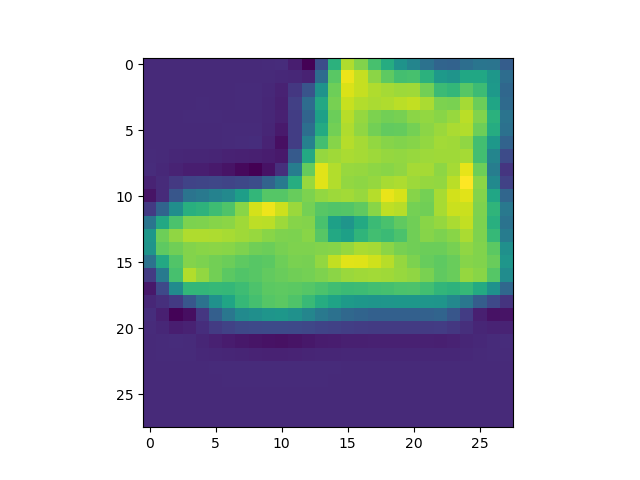

<IPython.core.display.Javascript object>


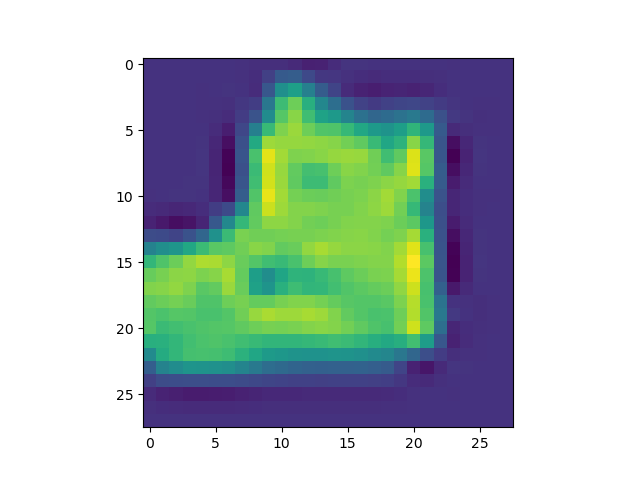

<IPython.core.display.Javascript object>


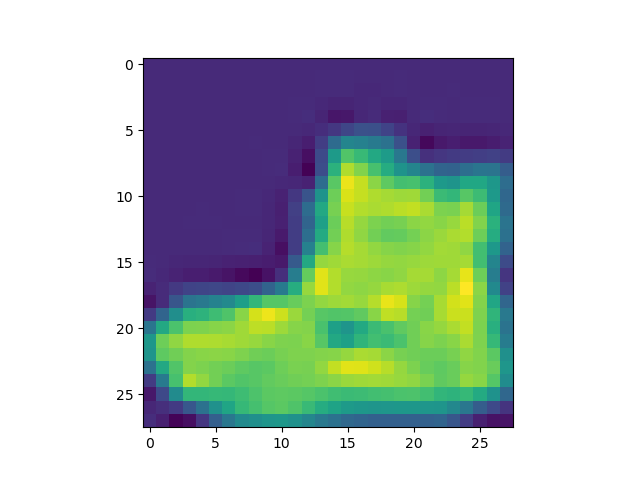

<IPython.core.display.Javascript object>


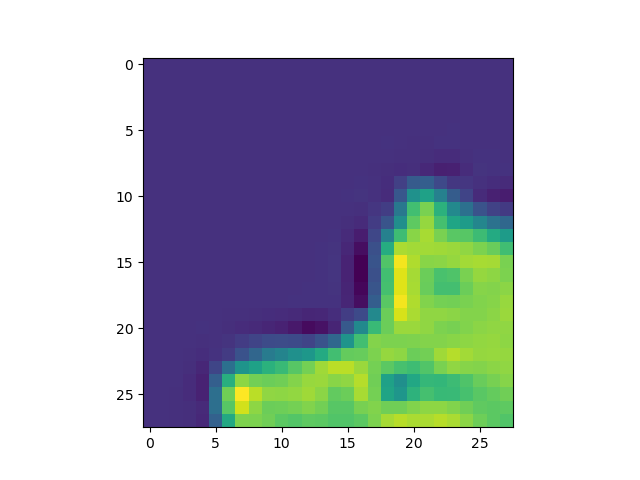

<IPython.core.display.Javascript object>


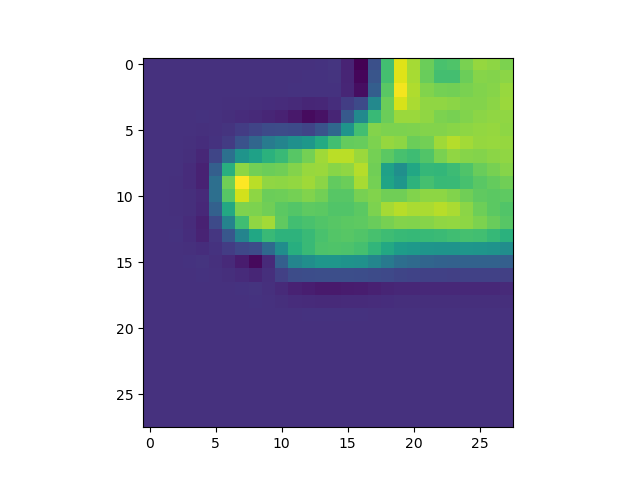

<IPython.core.display.Javascript object>


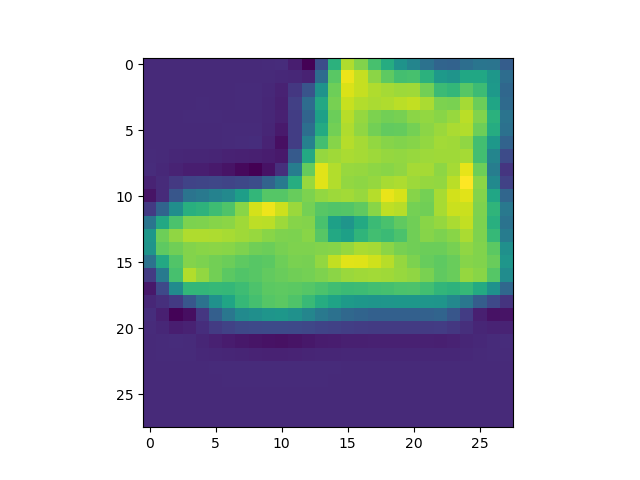

<IPython.core.display.Javascript object>


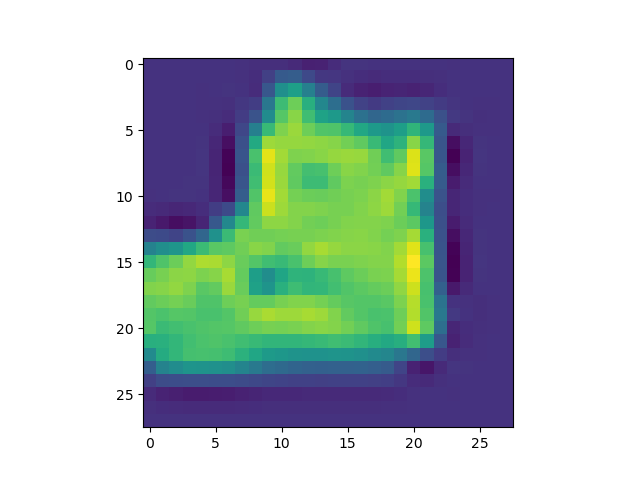

<IPython.core.display.Javascript object>


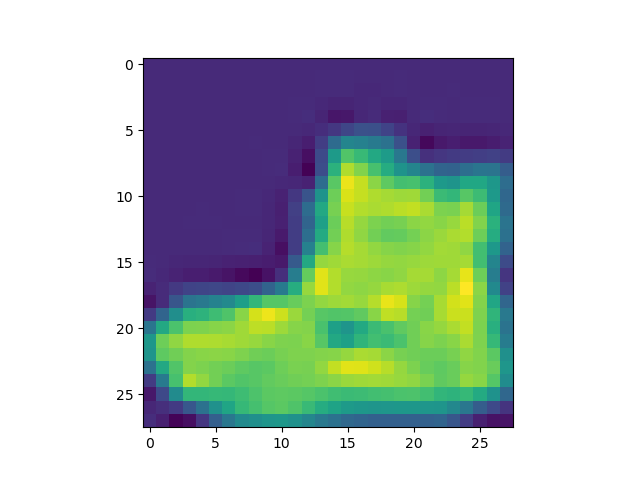

<ipython-input-13-68a586296195>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


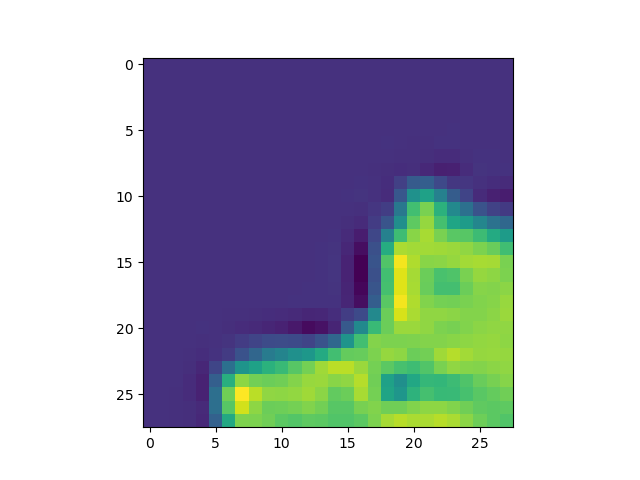

In [13]:
for i in range(20):
    plt.figure()
    plt.imshow(imim[i])

### Create a Dataset from the Syclops visual inputs
We are starting with a simple time series where the syclop starts from the same starting point, at the middle of the img on the x axis and the middle - 10 pixles on the y axis - (middle_point, middle_point - 10)
<br> Each time step the syclop will move one pixle up on the y axis, to a final point at (middle_point, middle_point + 10) and make a circular movement in the x direction.
<br> 

In [21]:
def create_dataset(images, labels, res, sample = 5):
    count = 0
    ts_images = []
    dvs_images = []
    count = 0
    #create subplot to hold examples from the dataset
    fig, ax = plt.subplots(2,5)
    i = 0 #indexises for the subplot for image and for syclop vision
    for img in images:
        orig_img = np.reshape(img,[28,28])
        #Set the padded image
        img=misc.build_mnist_padded(1./256*np.reshape(img,[1,28,28]))
        
        if count < 5:
            ax[0,i].imshow(orig_img) 
            plt.title(labels[count])
        #Set the sensor and the agent
        scene = syc.Scene(image_matrix=img)
        sensor = syc.Sensor(winx=56,winy=56,centralwinx=28,centralwiny=28)
        agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])
        #Setting the coordinates to visit
        q_sequence = np.array([[agent.max_q[0]//2, qq ] for qq in np.arange(agent.max_q[1]//2-10,agent.max_q[1]//2+10,2)])
        q_sequence += np.array([[pp, 0] for pp in [] + list(np.linspace(-5,5,6,dtype = int)) + list(-np.linspace(0,5,4,dtype = int))])
        #Setting the resolution function - starting with the regular resolution
        sensor.hp.resolution_fun = lambda x: bad_res101(x,(res,res))
        #Create empty lists to store the syclops outputs
        imim=[]
        dimim=[]
        agent.set_manual_trajectory(manual_q_sequence=q_sequence)
        #Run Syclop for 20 time steps
        for t in range(5):
            agent.manual_act()
            sensor.update(scene, agent)
            imim.append(sensor.central_frame_view)
            dimim.append(sensor.central_dvs_view)
        #Create a unified matrix from the list
        if count < 5:
            ax[1,i].imshow(imim[-3]) 
            plt.title(labels[count])
            i+=1

        imim = np.array(imim)
        dimim = np.array(dimim)
        #Add current proccessed image to lists
        ts_images.append(imim)
        dvs_images.append(dimim)
        count += 1
        


    ts_train = ts_images[:55_000]
    train_labels = labels[:55_000]
    ts_val = ts_images[55_000:]
    val_labels = labels[55_000:]

    dvs_train = dvs_images[:55_000]
    dvs_val = dvs_images[55_000:]
    
    class mnist_dataset(Dataset):
        def __init__(self, data, labels, transform = None):

            self.data = data
            self.labels = labels

            self.transform = transform
        def __len__(self):
            return len(self.data)

        def __getitem__(self, idx):
            '''
            args idx (int) :  index

            returns: tuple(data, label)
            '''
            data = self.data[idx]
            label = self.labels[idx]

            if self.transform:
                data = self.transform(data)
                return data, label
            else:
                return data, label

        def dataset(self):
            return self.data
        def labels(self):
            return self.labels



    train_dataset = mnist_dataset(dvs_train, train_labels)
    test_dataset = mnist_dataset(dvs_val, val_labels)
    batch = 64
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch, shuffle = True)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch, shuffle = True)

    
    return train_dataloader, test_dataloader



<IPython.core.display.Javascript object>


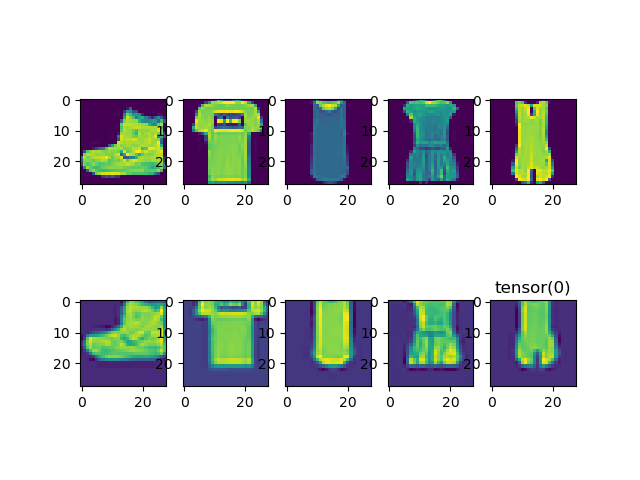

In [22]:
train_dataloader, test_dataloader = create_dataset(images, labels,res = 35)

In [23]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5,16,3,stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,32,3, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32,16,3,stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        
        self.pool = nn.MaxPool2d(2)
        
        #After the layers and pooling the first two we should get 
        # 16,3,3
        #Flatting it we get:
        # 144
        
        self.fc1 = nn.Linear(8*8*16,64)
        self.fc2 = nn.Linear(64,10)
        
        self.relu = nn.ReLU()
        
    def forward(self, img):
        
        img = self.pool(self.relu(self.bn1(self.conv1(img.double()))))
        img = self.pool(self.relu(self.bn2(self.conv2(img))))
        img = self.relu(self.bn3(self.conv3(img)))        
        #print(img.shape)
        img = img.view(img.shape[0],8*8*16)
        img = self.relu(self.fc1(img))
        img = self.fc2(img)
        
        return img

In [24]:
class CNN_one_layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16,3,stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,32,3, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32,16,3,stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        
        self.pool = nn.MaxPool2d(2)
        
        #After the layers and pooling the first two we should get 
        # 16,3,3
        #Flatting it we get:
        # 144
        
        self.fc1 = nn.Linear(8*8*16,64)
        self.fc2 = nn.Linear(64,10)
        
        self.relu = nn.ReLU()
        
    def forward(self, img):
        img = img[:,2,:,:]
        img = img.unsqueeze(1)
        img = self.pool(self.relu(self.bn1(self.conv1(img.double()))))
        img = self.pool(self.relu(self.bn2(self.conv2(img))))
        img = self.relu(self.bn3(self.conv3(img)))        
        #print(img.shape)
        img = img.view(img.shape[0],8*8*16)
        img = self.relu(self.fc1(img))
        img = self.fc2(img)
        
        return img

In [25]:
def train(train_dataloader, test_dataloader, net, epochs = 10):

    lr = 3e-3
    #net = CNN().double()
    optimizer = Adam(net.parameters(), lr = lr)
    loss_func = nn.CrossEntropyLoss()

    train_loss = []
    test_loss = []
    test_accur = []
    for epoch in range(epochs):

        batch_loss = []
        for batch_idx, (data,targets) in enumerate(train_dataloader):
            #print(batch_idx, data.shape, targets.shape)
            if net.__class__.__name__ == 'RNN_Net':
                data = data.unsqueeze(2)
            optimizer.zero_grad()
            output = net(data.double())
            loss = loss_func(output, targets)
            loss.backward()
            optimizer.step()
            batch_loss.append(loss.item())


        train_loss.append(np.mean(batch_loss))

        if epoch%1 == 0:
            correct = 0
            test_batch_loss = []
            test_accuracy = []
            for batch_idx, (test_data,test_targets) in enumerate(test_dataloader):
                #print(batch_idx, data.shape, targets.shape)
                if net.__class__.__name__ == 'RNN_Net':
                    test_data = test_data.unsqueeze(2)
                test_output = net(test_data)
                loss = loss_func(test_output, test_targets)
                test_batch_loss.append(loss.item())
                test_pred = test_output.data.max(1, keepdim = True)[1]
                correct = test_pred.eq(test_targets.data.view_as(test_pred)).sum()
                test_accuracy.append(100.*correct/len(test_targets))
            print('Net',net.__class__.__name__,'Epoch : ',epoch+1, '\t', 'loss :', loss.item(), 'accuracy :',np.mean(test_accuracy) )
            test_loss.append(np.mean(test_batch_loss))
            test_accur.append(np.mean(test_accuracy))
    
    return train_loss, test_loss, test_accur

In [28]:
train_loss, test_loss, test_accur =  train(train_dataloader, test_dataloader,net = CNN_one_layer().double(), epochs = 10)

Net CNN_one_layer Epoch :  1 	 loss : 0.03058804370908067 accuracy : 87.73734
Net CNN_one_layer Epoch :  2 	 loss : 0.3337633160173269 accuracy : 87.44067
Net CNN_one_layer Epoch :  3 	 loss : 0.12134344440850796 accuracy : 88.587814
Net CNN_one_layer Epoch :  4 	 loss : 0.14365480520513713 accuracy : 88.548256
Net CNN_one_layer Epoch :  5 	 loss : 0.4690368950079323 accuracy : 89.37895
Net CNN_one_layer Epoch :  6 	 loss : 0.06916207734259924 accuracy : 88.94383
Net CNN_one_layer Epoch :  7 	 loss : 0.006761695493167985 accuracy : 90.1701
Net CNN_one_layer Epoch :  8 	 loss : 0.0734515350617233 accuracy : 89.794304
Net CNN_one_layer Epoch :  9 	 loss : 0.06581936623056595 accuracy : 89.754745
Net CNN_one_layer Epoch :  10 	 loss : 0.06281489821256121 accuracy : 89.29984


In [58]:
import torch
torch.manual_seed(0)
torch.randint(3, 10, (3,))

tensor([7, 6, 3])

In [ ]:
train_loss, test_loss, test_accur =  train(train_dataloader, test_dataloader,net = CNN().double(), epochs = 10)

### Regular conv net with regular data stacked works as well with more then 99% accuracy - let's push it into an RNN and see that we replecate the resilts before moving to lower resolutions. 

In [26]:
class RNN_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16,3,stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,32,3, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32,16,3,stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        
        self.pool = nn.MaxPool2d(2)
        
        #After the layers and pooling the first two we should get 
        # 16,3,3
        #Flatting it we get:
        # 144
        self.gru = nn.GRU(8*8*16,100)
        self.fc1 = nn.Linear(100,10)
        #self.fc2 = nn.Linear(6,10)
        
        self.relu = nn.ReLU()
        
    def forward(self, data):
        hn = torch.zeros([1,data.shape[0],100]).double()
        #print(data.shape)
        for i in range(data.shape[1]):
            img = data[:,i,:,:,:]
            #print(img.shape)
            #plt.figure()
            #plt.imshow(img[0][0])
            img = self.pool(self.relu(self.bn1(self.conv1(img.double()))))
            img = self.pool(self.relu(self.bn2(self.conv2(img))))
            img = self.relu(self.bn3(self.conv3(img)))        
            img = img.view(img.shape[0],8*8*16)
            out, hn = self.gru(img.unsqueeze(0),hn)
            #print(out.shape)
        output = self.fc1(out[0, :, :])
        
        
        return output

In [27]:
class RNN_Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,4,3,stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,32,3, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32,16,3,stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        
        self.pool = nn.MaxPool2d(2)
        
        #After the layers and pooling the first two we should get 
        # 16,3,3
        #Flatting it we get:
        # 144
        self.gru = nn.GRU(8*8*16,100, batch_first=True)
        self.fc1 = nn.Linear(100,10)
        #self.fc2 = nn.Linear(6,10)
        
        self.relu = nn.ReLU()
        
    def forward(self, data):
        batch_size, timesteps, C, H, W = data.size()
        img = datax.view(batch_size * timesteps, C, H, W)
        img = self.pool(self.relu(self.bn1(self.conv1(img.double()))))
        img = self.pool(self.relu(self.bn2(self.conv2(img))))
        img = self.relu(self.bn3(self.conv3(img)))        
        print(img.shape)
        img = img.view(img.shape[0],img.shape[1],8*8*16)
        out, hn = self.gru(img)
        output = self.fc1(hn.squeeze(0))
        
        
        return output

In [38]:
train_loss, test_loss, test_accur =  train(train_dataloader, test_dataloader,net = RNN_Net().double(), epochs = 10)

Epoch :  1 	 loss : 0.004265323125684652 accuracy : 98.912186
Epoch :  2 	 loss : 0.020991770685789404 accuracy : 99.03085
Epoch :  3 	 loss : 0.5524997304981456 accuracy : 98.85285
Epoch :  4 	 loss : 0.09526686410688172 accuracy : 99.129745
Epoch :  5 	 loss : 0.00017887853745292805 accuracy : 98.75395
Epoch :  6 	 loss : 0.0010102674777342335 accuracy : 99.01108


### Mooving on to lower resolutions 

<IPython.core.display.Javascript object>


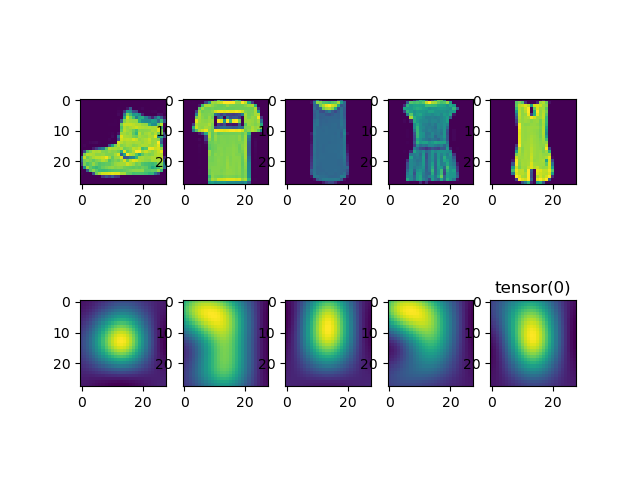

In [60]:
#Load the training data
train_dataloader, test_dataloader = create_dataset(images, labels,res = 5)

In [62]:
#Run the CNN over one image only
train_loss, test_loss, test_accur =  train(train_dataloader, test_dataloader,net = CNN_one_layer().double(), epochs = 4)

Net CNN_one_layer Epoch :  1 	 loss : 0.6928578578252791 accuracy : 66.0799
Net CNN_one_layer Epoch :  2 	 loss : 0.8037868644434882 accuracy : 68.730225
Net CNN_one_layer Epoch :  3 	 loss : 0.7896571620328736 accuracy : 70.05538
Net CNN_one_layer Epoch :  4 	 loss : 0.7016944606646146 accuracy : 70.43117


In [63]:
#Run the CNN over the stacked images
train_loss, test_loss, test_accur =  train(train_dataloader, test_dataloader,net = CNN().double(), epochs = 4)

Net CNN Epoch :  1 	 loss : 1.2028912876690765 accuracy : 77.49209
Net CNN Epoch :  2 	 loss : 1.4378103566202989 accuracy : 79.529274
Net CNN Epoch :  3 	 loss : 0.3269476456033512 accuracy : 80.28085
Net CNN Epoch :  4 	 loss : 0.33019151748928116 accuracy : 79.60838


In [61]:
#Run the CNN+RNN over the stacked images
train_loss, test_loss, test_accur =  train(train_dataloader, test_dataloader,net = RNN_Net().double(), epochs = 4)

Net RNN_Net Epoch :  1 	 loss : 0.9989843465900519 accuracy : 78.65902
Net RNN_Net Epoch :  2 	 loss : 0.6347406449322527 accuracy : 79.885284
Net RNN_Net Epoch :  3 	 loss : 1.1014116614995084 accuracy : 80.49842
Net RNN_Net Epoch :  4 	 loss : 0.795792869557406 accuracy : 81.03244


<IPython.core.display.Javascript object>


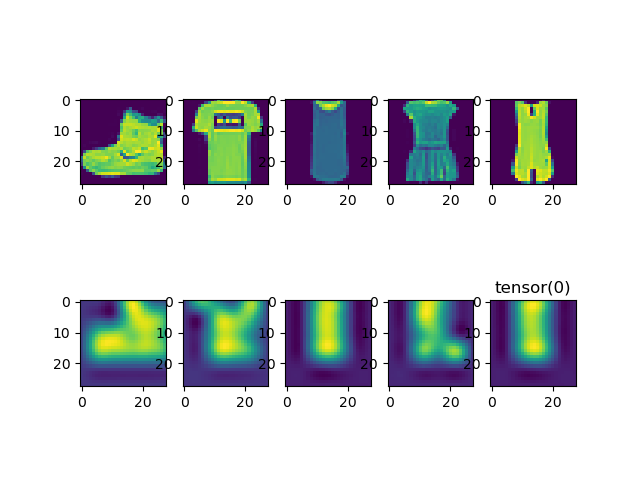

Net CNN_one_layer Epoch :  1 	 loss : 0.8468819584858501 accuracy : 75.61314
Net CNN_one_layer Epoch :  2 	 loss : 0.8553472816618723 accuracy : 78.144775
Net CNN_one_layer Epoch :  3 	 loss : 0.9999719163893587 accuracy : 78.69858
Net CNN_one_layer Epoch :  4 	 loss : 0.23043141044580015 accuracy : 79.72706
Net CNN_one_layer Epoch :  5 	 loss : 0.25626100885845104 accuracy : 80.10285
Net CNN_one_layer Epoch :  6 	 loss : 0.7040622617485761 accuracy : 79.45016
Net CNN_one_layer Epoch :  7 	 loss : 0.2477392345991362 accuracy : 80.32041
Net CNN_one_layer Epoch :  8 	 loss : 1.7461457307274335 accuracy : 80.18196
Net CNN_one_layer Epoch :  9 	 loss : 0.5653033834127785 accuracy : 79.62817
Net CNN_one_layer Epoch :  10 	 loss : 0.5629115004637181 accuracy : 80.18196
Net CNN_one_layer Epoch :  11 	 loss : 0.22827667731556014 accuracy : 80.65665
Net CNN_one_layer Epoch :  12 	 loss : 0.8726941151868367 accuracy : 79.529274
Net CNN_one_layer Epoch :  13 	 loss : 0.681903294584256 accuracy : 

<IPython.core.display.Javascript object>


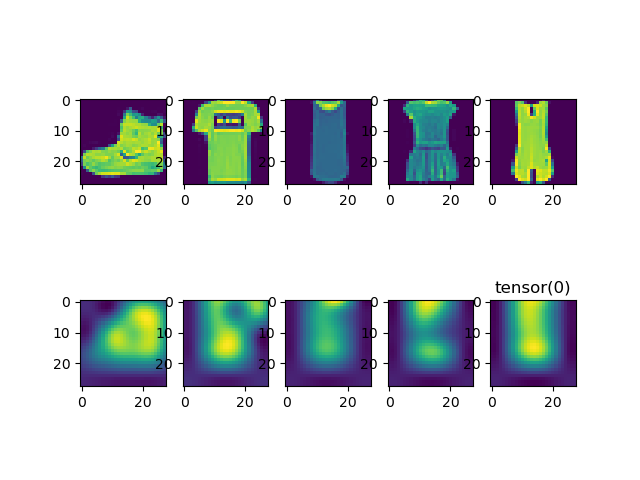

Net CNN_one_layer Epoch :  1 	 loss : 1.2694701720311454 accuracy : 68.88845
Net CNN_one_layer Epoch :  2 	 loss : 0.9555268430460757 accuracy : 70.0356
Net CNN_one_layer Epoch :  3 	 loss : 0.5563383706421446 accuracy : 72.09256
Net CNN_one_layer Epoch :  4 	 loss : 0.5249448717071857 accuracy : 71.73655
Net CNN_one_layer Epoch :  5 	 loss : 0.674012782833525 accuracy : 71.99367
Net CNN_one_layer Epoch :  6 	 loss : 0.5470562529044961 accuracy : 72.64636
Net CNN_one_layer Epoch :  7 	 loss : 1.019824887145959 accuracy : 72.68592
Net CNN_one_layer Epoch :  8 	 loss : 0.40532777377944196 accuracy : 72.40902
Net CNN_one_layer Epoch :  9 	 loss : 0.9125736530869603 accuracy : 72.86392
Net CNN_one_layer Epoch :  10 	 loss : 1.0595670689616603 accuracy : 72.11234
Net CNN_one_layer Epoch :  11 	 loss : 0.8090520766042987 accuracy : 72.80459
Net CNN_one_layer Epoch :  12 	 loss : 0.6121522447195601 accuracy : 72.72547
Net CNN_one_layer Epoch :  13 	 loss : 0.5649107082924201 accuracy : 72.468

<IPython.core.display.Javascript object>


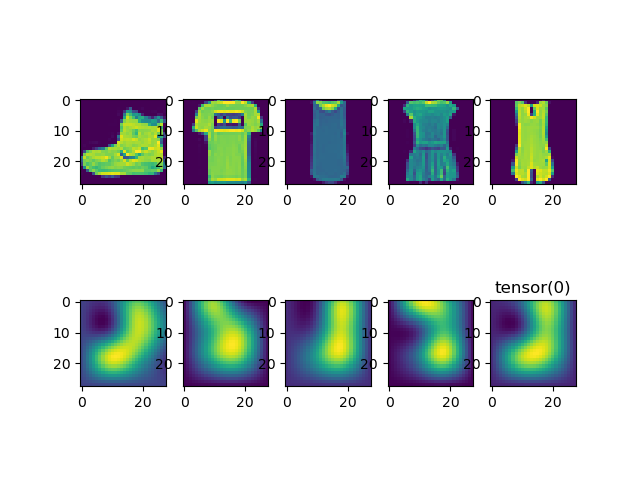

Net CNN_one_layer Epoch :  1 	 loss : 0.45779014076426033 accuracy : 62.579113
Net CNN_one_layer Epoch :  2 	 loss : 0.7840430652141233 accuracy : 62.89557
Net CNN_one_layer Epoch :  3 	 loss : 0.5289454610209097 accuracy : 66.099686
Net CNN_one_layer Epoch :  4 	 loss : 0.8437847558560478 accuracy : 66.04035
Net CNN_one_layer Epoch :  5 	 loss : 0.935326357776861 accuracy : 66.9106
Net CNN_one_layer Epoch :  6 	 loss : 0.6991664577583148 accuracy : 66.21835
Net CNN_one_layer Epoch :  7 	 loss : 1.070844089832165 accuracy : 67.22706
Net CNN_one_layer Epoch :  8 	 loss : 0.5265712776981499 accuracy : 66.93038
Net CNN_one_layer Epoch :  9 	 loss : 1.3359265152739697 accuracy : 66.00079
Net CNN_one_layer Epoch :  10 	 loss : 1.2890736950744923 accuracy : 67.08861
Net CNN_one_layer Epoch :  11 	 loss : 0.45094992967453584 accuracy : 67.36551
Net CNN_one_layer Epoch :  12 	 loss : 0.8550337044293519 accuracy : 67.40506
Net CNN_one_layer Epoch :  13 	 loss : 0.5675310442493404 accuracy : 67.

<IPython.core.display.Javascript object>


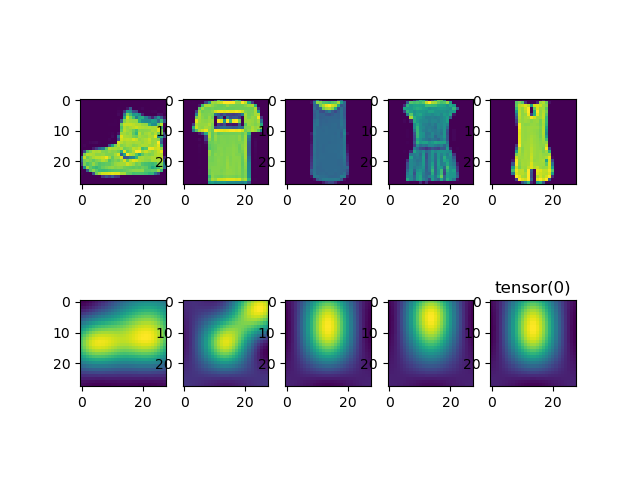

Net CNN_one_layer Epoch :  1 	 loss : 1.2733524960810567 accuracy : 55.18196
Net CNN_one_layer Epoch :  2 	 loss : 1.921934839501058 accuracy : 56.546677
Net CNN_one_layer Epoch :  3 	 loss : 0.5436739709847231 accuracy : 58.247627
Net CNN_one_layer Epoch :  4 	 loss : 1.0960867958655778 accuracy : 58.049843
Net CNN_one_layer Epoch :  5 	 loss : 1.3526122898846409 accuracy : 59.553005
Net CNN_one_layer Epoch :  6 	 loss : 1.3895673118147966 accuracy : 58.939873
Net CNN_one_layer Epoch :  7 	 loss : 1.2476547091060006 accuracy : 60.700157
Net CNN_one_layer Epoch :  8 	 loss : 1.4529355453960058 accuracy : 60.04747
Net CNN_one_layer Epoch :  9 	 loss : 1.5728967576833166 accuracy : 59.553005
Net CNN_one_layer Epoch :  10 	 loss : 0.9030113884368863 accuracy : 61.135284
Net CNN_one_layer Epoch :  11 	 loss : 1.046083505005388 accuracy : 60.56171
Net CNN_one_layer Epoch :  12 	 loss : 1.1150175386236487 accuracy : 61.273735
Net CNN_one_layer Epoch :  13 	 loss : 1.1894958220258578 accuracy

<IPython.core.display.Javascript object>


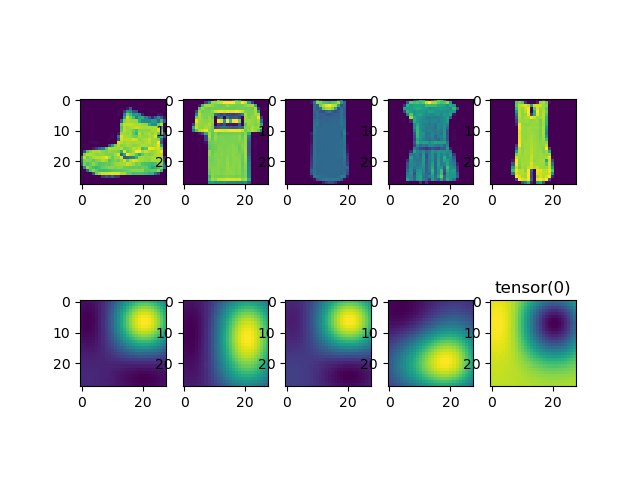

Net CNN_one_layer Epoch :  1 	 loss : 2.308180569854002 accuracy : 54.746834
Net CNN_one_layer Epoch :  2 	 loss : 0.9566899313305344 accuracy : 56.665348
Net CNN_one_layer Epoch :  3 	 loss : 1.3166548821477146 accuracy : 57.2587
Net CNN_one_layer Epoch :  4 	 loss : 0.5279296401520733 accuracy : 59.196995
Net CNN_one_layer Epoch :  5 	 loss : 0.6856041075973153 accuracy : 59.651897
Net CNN_one_layer Epoch :  6 	 loss : 0.8360960159332712 accuracy : 59.25633
Net CNN_one_layer Epoch :  7 	 loss : 1.7998140702312058 accuracy : 58.405853
Net CNN_one_layer Epoch :  8 	 loss : 0.9966837545440185 accuracy : 59.25633
Net CNN_one_layer Epoch :  9 	 loss : 0.8474916579719719 accuracy : 59.829906
Net CNN_one_layer Epoch :  10 	 loss : 0.5972585246133509 accuracy : 59.434334
Net CNN_one_layer Epoch :  11 	 loss : 0.5403991866483656 accuracy : 59.829906
Net CNN_one_layer Epoch :  12 	 loss : 1.1743709138198755 accuracy : 59.553005
Net CNN_one_layer Epoch :  13 	 loss : 0.7961868015983201 accuracy

<IPython.core.display.Javascript object>


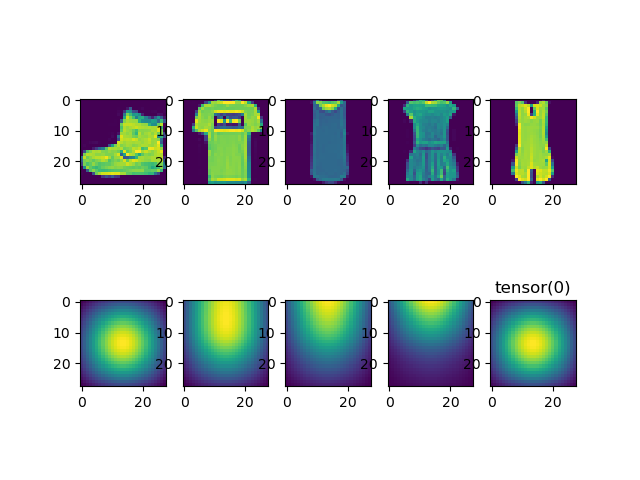

Net CNN_one_layer Epoch :  1 	 loss : 1.743202953325058 accuracy : 30.102848
Net CNN_one_layer Epoch :  2 	 loss : 1.9079049228764295 accuracy : 31.863132
Net CNN_one_layer Epoch :  3 	 loss : 2.1501204841344452 accuracy : 31.408228
Net CNN_one_layer Epoch :  4 	 loss : 1.862552592659749 accuracy : 32.733387
Net CNN_one_layer Epoch :  5 	 loss : 2.1619764958120213 accuracy : 31.685127
Net CNN_one_layer Epoch :  6 	 loss : 2.0027010185695575 accuracy : 31.566456
Net CNN_one_layer Epoch :  7 	 loss : 1.5291181701815317 accuracy : 32.17959
Net CNN_one_layer Epoch :  8 	 loss : 1.7134637178216419 accuracy : 32.456486
Net CNN_one_layer Epoch :  9 	 loss : 1.5918620220171744 accuracy : 32.990505
Net CNN_one_layer Epoch :  10 	 loss : 1.8392586126469088 accuracy : 33.18829
Net CNN_one_layer Epoch :  11 	 loss : 2.127609809089461 accuracy : 33.18829
Net CNN_one_layer Epoch :  12 	 loss : 1.7385410304762872 accuracy : 32.733387
Net CNN_one_layer Epoch :  13 	 loss : 2.06816498588558 accuracy : 

<IPython.core.display.Javascript object>


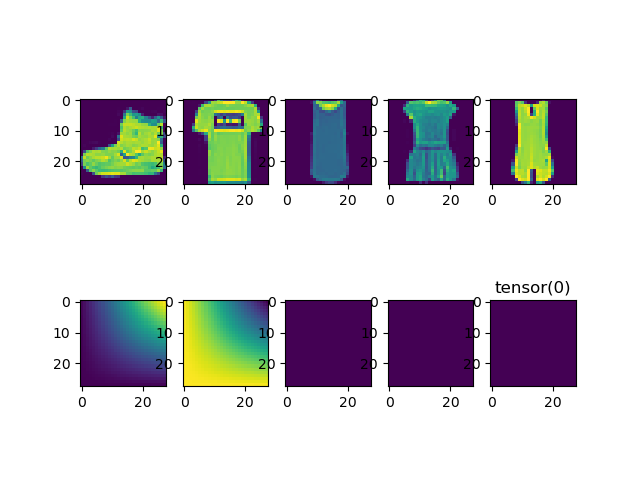

Net CNN_one_layer Epoch :  1 	 loss : 1.8515787451050283 accuracy : 26.087816
Net CNN_one_layer Epoch :  2 	 loss : 1.4646823041761619 accuracy : 27.234968
Net CNN_one_layer Epoch :  3 	 loss : 2.223374103284441 accuracy : 27.037184
Net CNN_one_layer Epoch :  4 	 loss : 1.7600973408234832 accuracy : 27.630537
Net CNN_one_layer Epoch :  5 	 loss : 1.6223825648190693 accuracy : 27.768988
Net CNN_one_layer Epoch :  6 	 loss : 2.4928456864761492 accuracy : 27.373417
Net CNN_one_layer Epoch :  7 	 loss : 1.903489788378386 accuracy : 27.155855
Net CNN_one_layer Epoch :  8 	 loss : 1.8278500529451567 accuracy : 28.204113
Net CNN_one_layer Epoch :  9 	 loss : 2.0720541495793956 accuracy : 27.788765
Net CNN_one_layer Epoch :  10 	 loss : 1.603057829735321 accuracy : 29.311708
Net CNN_one_layer Epoch :  11 	 loss : 2.0104689743934254 accuracy : 28.006329
Net CNN_one_layer Epoch :  12 	 loss : 1.416289145412181 accuracy : 29.608387
Net CNN_one_layer Epoch :  13 	 loss : 1.7206100124292467 accurac

In [28]:
res_list = [10,8,6,5,4,3,2]
cnn_one_image = []
cnn_lasagna = []
cnn_rnn = []
cnn_one_image_train_loss = []
cnn_lasagna_train_loss = []
cnn_rnn_train_loss = []
for res in res_list:
    #Load the training data
    train_dataloader, test_dataloader = create_dataset(images, labels,res = res)
    #Run the CNN over one image only
    cnn1_train_loss, cnn1_test_loss, cnn1_test_accur =  train(train_dataloader, test_dataloader,net = CNN_one_layer().double(), epochs = 20)
    cnn_one_image.append(cnn1_test_accur[-1])
    cnn_one_image_train_loss.append(cnn1_train_loss[-1])
    #Run the CNN over the stacked images
    cnn_train_loss, cnn_test_loss, cnn_test_accur =  train(train_dataloader, test_dataloader,net = CNN().double(), epochs = 20)
    cnn_lasagna.append(cnn_test_accur[-1])
    cnn_lasagna_train_loss.append(cnn_train_loss[-1])
    #Run the CNN+RNN over the stacked images
    rnn_train_loss, rnn_test_loss, rnn_test_accur =  train(train_dataloader, test_dataloader,net = RNN_Net().double(), epochs = 20)
    cnn_rnn.append(rnn_test_accur[-1])
    cnn_rnn_train_loss.append(rnn_train_loss[-1])

In [ ]:
#Load the training data
train_dataloader, test_dataloader = create_dataset(images, labels,res = 1)
#Run the CNN over one image only
cnn1_train_loss, cnn1_test_loss, cnn1_test_accur =  train(train_dataloader, test_dataloader,net = CNN_one_layer().double(), epochs = 20)
cnn_one_image.append(cnn1_test_accur[-1])
cnn_one_image_train_loss.append(cnn1_train_loss[-1])
#Run the CNN over the stacked images
cnn_train_loss, cnn_test_loss, cnn_test_accur =  train(train_dataloader, test_dataloader,net = CNN().double(), epochs = 20)
cnn_lasagna.append(cnn_test_accur[-1])
cnn_lasagna_train_loss.append(cnn_train_loss[-1])
#Run the CNN+RNN over the stacked images
rnn_train_loss, rnn_test_loss, rnn_test_accur =  train(train_dataloader, test_dataloader,net = RNN_Net().double(), epochs = 20)
cnn_rnn.append(rnn_test_accur[-1])
cnn_rnn_train_loss.append(rnn_train_loss[-1])

<IPython.core.display.Javascript object>

Net CNN_one_layer Epoch :  1 	 loss : 1.9440211279520923 accuracy : 23.219936
Net CNN_one_layer Epoch :  2 	 loss : 1.8416018664155902 accuracy : 23.061708
Net CNN_one_layer Epoch :  3 	 loss : 2.1872440056873845 accuracy : 22.64636
Net CNN_one_layer Epoch :  4 	 loss : 2.2897915401431144 accuracy : 22.765032
Net CNN_one_layer Epoch :  5 	 loss : 2.70531105971385 accuracy : 22.66614
Net CNN_one_layer Epoch :  6 	 loss : 2.1764904894371004 accuracy : 22.725475
Net CNN_one_layer Epoch :  7 	 loss : 1.8835155611756025 accuracy : 23.002373
Net CNN_one_layer Epoch :  8 	 loss : 2.280076470057608 accuracy : 21.954113
Net CNN_one_layer Epoch :  9 	 loss : 1.9662206021615156 accuracy : 22.844145
Net CNN_one_layer Epoch :  10 	 loss : 2.1092885432502793 accuracy : 23.575949
Net CNN_one_layer Epoch :  11 	 loss : 1.8601108118657437 accuracy : 23.299051
Net CNN_one_layer Epoch :  12 	 loss : 2.4749925043172065 accuracy : 23.140823
Net CNN_one_layer Epoch :  13 	 loss : 2.462962306314356 accuracy 

<IPython.core.display.Javascript object>


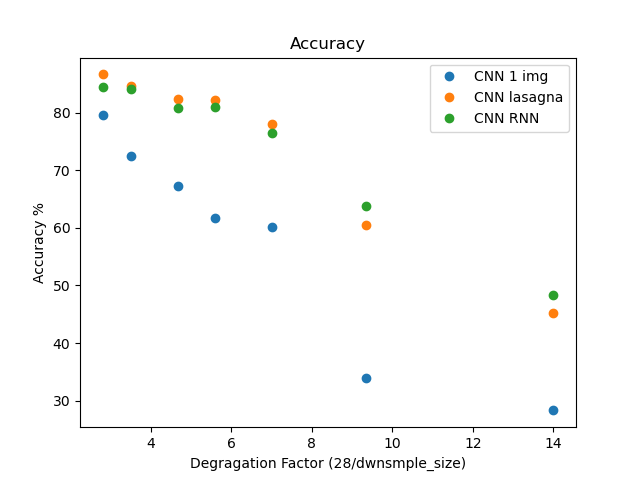

<IPython.core.display.Javascript object>


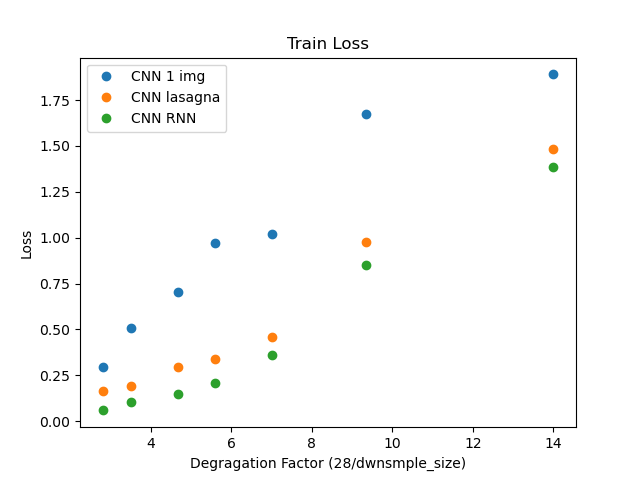

In [29]:
plt.figure()
plt.plot(28/np.array(res_list),cnn_one_image,'o', label = 'CNN 1 img')
plt.plot(28/np.array(res_list),cnn_lasagna,'o', label = 'CNN lasagna')
plt.plot(28/np.array(res_list),cnn_rnn,'o', label = 'CNN RNN')
plt.title('Accuracy')
plt.xlabel('Degragation Factor (28/dwnsmple_size)')
plt.ylabel('Accuracy %')
plt.legend()

plt.figure()
plt.plot(28/np.array(res_list),cnn_one_image_train_loss,'o', label = 'CNN 1 img')
plt.plot(28/np.array(res_list),cnn_lasagna_train_loss, 'o',label = 'CNN lasagna')
plt.plot(28/np.array(res_list),cnn_rnn_train_loss, 'o',label = 'CNN RNN')
plt.title('Train Loss')
plt.xlabel('Degragation Factor (28/dwnsmple_size)')
plt.ylabel('Loss')
plt.legend()

<IPython.core.display.Javascript object>


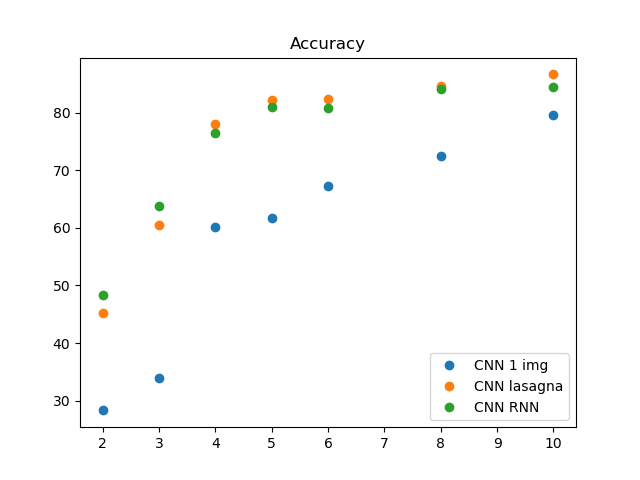

<IPython.core.display.Javascript object>


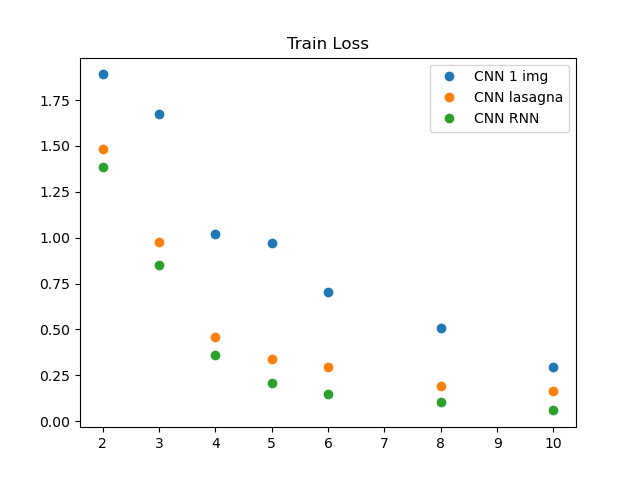

In [30]:
plt.figure()
plt.plot(np.array(res_list),cnn_one_image,'o', label = 'CNN 1 img')
plt.plot(np.array(res_list),cnn_lasagna,'o', label = 'CNN lasagna')
plt.plot(np.array(res_list),cnn_rnn,'o', label = 'CNN RNN')
plt.title('Accuracy')
plt.legend()

plt.figure()
plt.plot(np.array(res_list),cnn_one_image_train_loss,'o', label = 'CNN 1 img')
plt.plot(np.array(res_list),cnn_lasagna_train_loss, 'o',label = 'CNN lasagna')
plt.plot(np.array(res_list),cnn_rnn_train_loss, 'o',label = 'CNN RNN')
plt.title('Train Loss')
plt.legend()